In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Crop_recommendation.csv")

In [3]:
df.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,Unnamed: 8,Unnamed: 9
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,NaN,NaN
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,NaN,NaN
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,NaN,NaN
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,NaN,NaN
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,NaN,NaN


#### eliminating unnamed columns (empty columns)

In [4]:
df = df.iloc[:,:-2]

In [5]:
df

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


#### changing the column name

In [6]:
df.rename(columns={"label":"CropName"},inplace=True)

In [7]:
df

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,CropName
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


#### visualizing the data

In [8]:
df.describe()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   phosphorus   2200 non-null   int64  
 2   potassium    2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   CropName     2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [10]:
df.isna().any()

Nitrogen       False
phosphorus     False
potassium      False
temperature    False
humidity       False
ph             False
rainfall       False
CropName       False
dtype: bool

In [11]:
import seaborn as sns
import matplotlib as plt

In [12]:
correlation_data = df.iloc[:,:-1].corr()

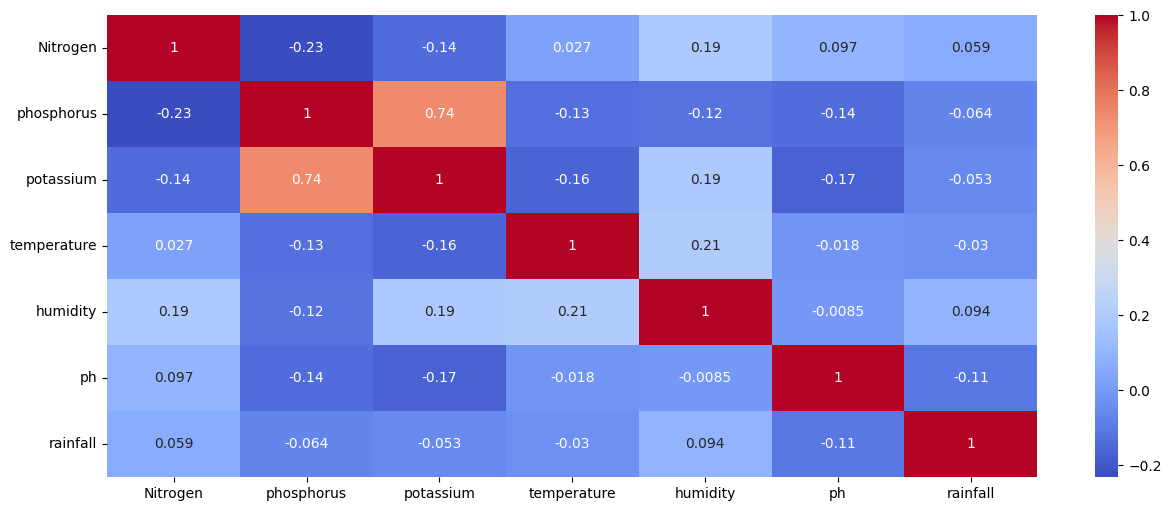

In [13]:
plt.pyplot.figure(figsize=(15,6))
sns.heatmap(correlation_data,annot=True,cmap ='coolwarm')
plt.pyplot.show()

#### adding new columns to the dataframe

In [14]:
def label_crop(crop):
    if crop in ['pomegranate', 'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya', 'coconut', 'coffee']:
        return 'Fruit'
    elif crop in ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans', 'mungbean', 'blackgram', 'lentil']:
        return 'Grain'
    return 'Fiber'

In [15]:
def get_sowing_season(crop):
    return 'Summer' if crop in ['rice', 'maize', 'pigeonpeas', 'mothbeans', 'mungbean', 'blackgram', 'kidneybeans', 'cotton', 'jute', 'watermelon', 'muskmelon','coffee'] else 'Winter'

In [16]:
CropType = []
for value in df["CropName"]:
    CropType.append(label_crop(value))

In [17]:
df

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,CropName
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [18]:
df["Crop Type"] = CropType

In [19]:
df["Crop Type"].value_counts()

Crop Type
Fruit    1100
Grain     900
Fiber     200
Name: count, dtype: int64

In [20]:
df

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,CropName,Crop Type
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,Grain
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,Grain
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,Grain
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,Grain
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,Grain
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,Fruit
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,Fruit
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,Fruit
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,Fruit


In [21]:
SowSeason = []
for value in df["CropName"]:
    SowSeason.append(get_sowing_season(value))

In [22]:
df["Sow Season"] = SowSeason

In [23]:
df["Sow Season"].value_counts()

Sow Season
Summer    1200
Winter    1000
Name: count, dtype: int64

In [24]:
df

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,CropName,Crop Type,Sow Season
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,Grain,Summer
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,Grain,Summer
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,Grain,Summer
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,Grain,Summer
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,Grain,Summer
...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,Fruit,Summer
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,Fruit,Summer
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,Fruit,Summer
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,Fruit,Summer


#### visualizing data

<BarContainer object of 3 artists>

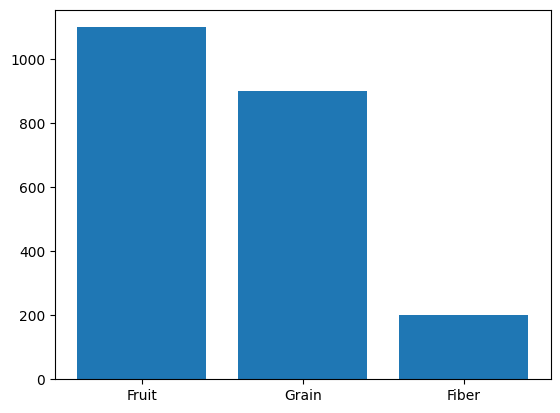

In [25]:
crop_counts = df["Crop Type"].value_counts()
plt.pyplot.bar(crop_counts.index,crop_counts.values)

<BarContainer object of 2 artists>

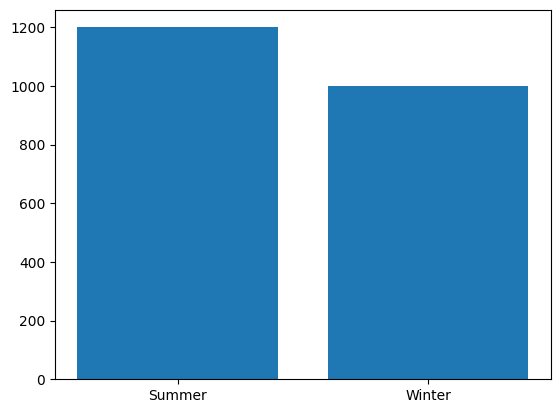

In [26]:
sow_counts = df["Sow Season"].value_counts()
plt.pyplot.bar(sow_counts.index,sow_counts.values)

#### making the model

In [27]:
X = df.drop(columns = ["CropName"])
y = df["CropName"]

In [28]:
X

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,Crop Type,Sow Season
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Grain,Summer
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Grain,Summer
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Grain,Summer
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Grain,Summer
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Grain,Summer
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Fruit,Summer
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Fruit,Summer
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Fruit,Summer
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Fruit,Summer


In [29]:
y

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: CropName, Length: 2200, dtype: object

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

In [31]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 2)

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [34]:
# step1 = ColumnTransformer(transformers=[('col-tnf',OneHotEncoder(sparse_output = False, drop= 'first'),[7,8])],remainder = 'passthrough')
# step2 = LinearRegression()
# pipe = Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])
# pipe.fit(X_train,y_train)
# y_pred = pipe.predict(X_test)

# print('R2 score',r2_score(y_test,y_pred))

#### implementing Random Forest Algorithm

In [37]:
step1 = ColumnTransformer(transformers=[('col-tnf',OneHotEncoder(sparse_output = False, drop= 'first'),[7,8])],remainder = 'passthrough')

step2 = RandomForestRegressor(
    n_estimators = 100,
    random_state = 3,
    max_samples = 0.5,
    max_features = 0.75,
    max_depth = 15
)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9829646158749468
MAE 0.35687654614694936


In [38]:
import pickle as pkl

In [39]:
pkl.dump(pipe,open('crop.pkl','wb'))

In [40]:
pkl.dump(df,open('df.pkl','wb'))

In [41]:
y

array([20, 20, 20, ...,  5,  5,  5])

In [42]:
with open("label_encoder.pkl", "wb") as encoder_file:
    pkl.dump(label_encoder, encoder_file)

In [43]:
# pip freeze > requirements1.txt

In [44]:
# pip show pickle

In [45]:
df["CropName"].value_counts()

CropName
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [47]:
df[df['CropName'].str.contains('papaya', case=False)]

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,CropName,Crop Type,Sow Season
1700,61,68,50,35.214628,91.497251,6.793245,243.074507,papaya,Fruit,Winter
1701,58,46,45,42.394134,90.790281,6.576261,88.466075,papaya,Fruit,Winter
1702,45,47,55,38.419163,91.142204,6.751453,119.265388,papaya,Fruit,Winter
1703,39,65,53,35.332949,92.115086,6.560743,235.613359,papaya,Fruit,Winter
1704,31,68,45,42.923253,90.076005,6.938313,196.240824,papaya,Fruit,Winter
...,...,...,...,...,...,...,...,...,...,...
1795,42,59,55,40.102077,94.351102,6.979102,149.119999,papaya,Fruit,Winter
1796,43,64,47,38.589545,91.580765,6.825665,102.270823,papaya,Fruit,Winter
1797,35,67,49,41.313301,91.150880,6.617067,239.742755,papaya,Fruit,Winter
1798,56,59,55,37.035519,91.794302,6.551893,188.518142,papaya,Fruit,Winter
